# Creating Data

## Creating sample dataframes using Pandas library

In [98]:
# import pandas library - we also import numpy for use in a couple examples
import pandas as pd
import numpy as np

Pandas is an open-source Python library used for data analysis. Here we will use it to create sample data to demostrate how it works. 

More info here: https://pandas.pydata.org/

Firstly, check the version numbers of both:

In [99]:
pd.__version__

'0.25.1'

In [100]:
np.__version__

'1.17.2'

In [101]:
pd?

<strong>Series</strong>

In [102]:
s = pd.Series([1, 3, 5, 6, np.nan, 8]) # A one-dimensional array/list

In [103]:
s

0    1.0
1    3.0
2    5.0
3    6.0
4    NaN
5    8.0
dtype: float64

Using <strong>np.nan</strong> we can enter a null/missing value

In [104]:
s[4]

nan

We can add our own index using strings:

In [105]:
s = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['Value 1', 'Value 2', 'Value 3', 'Value 4'])


In [106]:
s

Value 1    0.25
Value 2    0.50
Value 3    0.75
Value 4    1.00
dtype: float64

And then access by index

In [107]:
s['Value 1']

0.25

<strong>DataFrames</strong>

Two-dimensional tabular data

Creating a DataFrame from Python dictionaries:

In [108]:
df = pd.DataFrame({
    'Height in cm': [180,np.nan,175,170,159],
    'Weight in kg': [90,89,77,69,np.nan],
    'Names': ['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany']
    })

In [109]:
df

,Height in cm,Weight in kg,Names
0,180.0,90.0,Bob
1,NaN,89.0,Sue
2,175.0,77.0,Muhammed
3,170.0,69.0,Jin
4,159.0,NaN,Brittany


In [110]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [111]:
df.columns

Index(['Height in cm', 'Weight in kg', 'Names'], dtype='object')

In [112]:
df.set_index('Names') # Uses the Names values as the index

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [158]:
df.index

Index(['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany'], dtype='object', name='Names')

In [159]:
df.columns

Index(['Height in cm', 'Weight in kg'], dtype='object')

In [160]:
df['Height in cm']

Names
Bob         180.0
Sue           NaN
Muhammed    175.0
Jin         170.0
Brittany    159.0
Name: Height in cm, dtype: float64

In [163]:
df['Weight in kg']

Names
Bob         90.0
Sue         89.0
Muhammed    77.0
Jin         69.0
Brittany     NaN
Name: Weight in kg, dtype: float64

In [113]:
df # Original DataFrame has not been modified

,Height in cm,Weight in kg,Names
0,180.0,90.0,Bob
1,NaN,89.0,Sue
2,175.0,77.0,Muhammed
3,170.0,69.0,Jin
4,159.0,NaN,Brittany


If we want to keep our new DataFrame we can store in a variable:

In [114]:
names_as_index = df.set_index('Names')

In [115]:
names_as_index 

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


Alternatively, we can change DataFrame 'in-place':

In [116]:
df.set_index('Names', inplace=True)

In [117]:
df

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


We can define Python functions and apply them to our data using <strong>apply()</strong>:

In [118]:
def mySq(x):
    return x * x

In [119]:
df['Height in cm'].apply(mySq)

Names
Bob         32400.0
Sue             NaN
Muhammed    30625.0
Jin         28900.0
Brittany    25281.0
Name: Height in cm, dtype: float64

In [120]:
def myExp(x, e):
    return x ** e

In [121]:
df['Height in cm'].apply(myExp, e=4)

Names
Bob         1.049760e+09
Sue                  NaN
Muhammed    9.378906e+08
Jin         8.352100e+08
Brittany    6.391290e+08
Name: Height in cm, dtype: float64

# loc and iloc

The <strong>loc</strong> attribute allows indexing and slicing using explicit index. The <strong>iloc</strong> attribute allows indexing and slicing that always references the implicit Python-style index:

In [180]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

In [181]:
data

1    a
3    b
5    c
dtype: object

In [182]:
data.loc[1]

'a'

In [183]:
data.iloc[1]

'b'

In [184]:
data.iloc[0]

'a'

# Cleaning Data

## Dealing with missing/null values

In [122]:
df

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [123]:
df.isnull()

,Height in cm,Weight in kg
Names,,
Bob,False,False
Sue,True,False
Muhammed,False,False
Jin,False,False
Brittany,False,True


In [124]:
df.notnull()

,Height in cm,Weight in kg
Names,,
Bob,True,True
Sue,False,True
Muhammed,True,True
Jin,True,True
Brittany,True,False


In [125]:
df.isnull().sum(axis='columns')

Names
Bob         0
Sue         1
Muhammed    0
Jin         0
Brittany    1
dtype: int64

In [126]:
df.isnull().sum(axis='rows')

Height in cm    1
Weight in kg    1
dtype: int64

In [127]:
df[df['Height in cm'].isnull()]

,Height in cm,Weight in kg
Names,,
Sue,NaN,89.0


In [128]:
df[df['Weight in kg'].isnull()]

,Height in cm,Weight in kg
Names,,
Brittany,159.0,NaN


In [129]:
df.dropna(how='any') # Drop all rows with any NaN values

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Muhammed,175.0,77.0
Jin,170.0,69.0


In [130]:
df # Original DataFrame still there

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [131]:
df.dropna(how='all') # Drop all rows with all NaN values

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [132]:
df.fillna('No response') # Fill the missing values with other values instead

,Height in cm,Weight in kg
Names,,
Bob,180,90
Sue,No response,89
Muhammed,175,77
Jin,170,69
Brittany,159,No response


In [133]:
df.fillna(df.mean()) # Replace all null values with the mean 

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.00
Sue,171.0,89.00
Muhammed,175.0,77.00
Jin,170.0,69.00
Brittany,159.0,81.25


# Reading Data


## Loading .csv files

Firstly, I'm going to create the .csv file from a DataFrame. 

This step is not neccesary but helps if we have trouble loading data in the session

In [134]:
going_to_make_this_a_csv = pd.DataFrame({
        'Column 1': [1,2,3,4,5],
        'Column 2': ['One','Two','Three','Four','Five'],
        'Observer': ['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany']
})

In [135]:
my_csv = going_to_make_this_a_csv.set_index('Observer')

In [136]:
my_csv.to_csv('i_made_this.csv') # Use to_csv() to output DataFrame to .csv file

In [137]:
%ls i*

i_made_this.csv              i_made_this_spreadsheet.xls


In [138]:
my_csv = pd.read_csv('i_made_this.csv')

In [139]:
my_csv

,Observer,Column 1,Column 2
0,Bob,1,One
1,Sue,2,Two
2,Muhammed,3,Three
3,Jin,4,Four
4,Brittany,5,Five


In [140]:
my_csv.columns = ['Observer', 'Value One', 'Value Two'] # Change column header names

In [141]:
my_csv

,Observer,Value One,Value Two
0,Bob,1,One
1,Sue,2,Two
2,Muhammed,3,Three
3,Jin,4,Four
4,Brittany,5,Five


## Outputting to and Loading Excel spreadsheets

In [142]:
going_to_make_this_an_excel_spreadsheet = pd.DataFrame({
        'Column 1': [5,4,3,2,1],
        'Column 2': ['Five','Four','Three','Two','One'],
        'Observer': ['Brian', 'Claire', 'Jayashree', 'Erfan', 'Pablo']
})

In [143]:
going_to_make_this_an_excel_spreadsheet.to_excel('i_made_this_spreadsheet.xls') # .xls or .xlsx extenionsion required

In [144]:
%ls i_made*

i_made_this.csv              i_made_this_spreadsheet.xls


In [145]:
my_excel = pd.read_excel('i_made_this_spreadsheet.xls')

In [146]:
my_excel

,Unnamed: 0,Column 1,Column 2,Observer
0,0,5,Five,Brian
1,1,4,Four,Claire
2,2,3,Three,Jayashree
3,3,2,Two,Erfan
4,4,1,One,Pablo


In [147]:
my_excel.drop(columns=['Unnamed: 0'])

,Column 1,Column 2,Observer
0,5,Five,Brian
1,4,Four,Claire
2,3,Three,Jayashree
3,2,Two,Erfan
4,1,One,Pablo


## JSON or HTML anyone?

In [148]:
my_excel.to_json('json_representation.json')

In [149]:
my_excel.to_html('html_representation.html')

# Transforming and Aggregating

In [150]:
import seaborn as sns # Importing seaborn library as it contains a built-in dataset

In [151]:
tips = sns.load_dataset('tips')

In [152]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [153]:
mean_tip_by_sex = tips.groupby('sex')['tip'].aggregate('mean').rename("Mean Tip").reset_index()


In [154]:
mean_tip_by_sex

,sex,Mean Tip
0,Male,3.089618
1,Female,2.833448


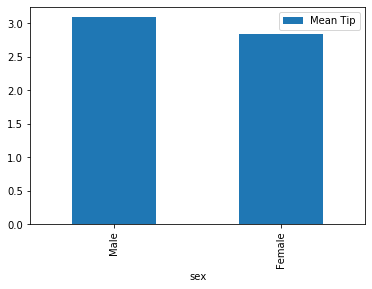

In [155]:
mean_tip_by_sex.set_index('sex').plot(kind='bar')

In [156]:
mean_tip_by_day = tips.groupby('day')['tip'].aggregate('mean').rename("Mean Tip").reset_index()

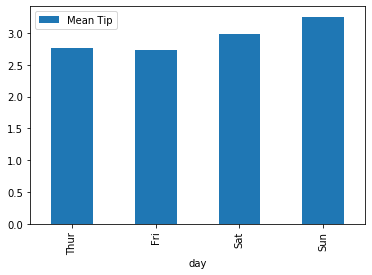

In [157]:
mean_tip_by_day.set_index('day').plot(kind='bar')